In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Exercici 1

Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

Crea almenys una visualització per:

    Una variable categòrica (Districte o Barri)
    Una variable numèrica (Preu)
    Una variable numèrica i una categòrica (Districte i Preu)
    Dues variables numèriques (Any o Trimestre i Preu)
    Tres variables (Barri o Districte, Trimestre i Preu)


- **Descarreguem el dataframe:**


In [2]:
df = pd.read_csv('preu lloguer per trimestre i barri.csv')

- **Obrim el dataframe:**

In [5]:
df

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


- **Mirem la informació del dataframe: quines variables tenim,de quin tipus i quantes dades no nuls tenen cadascuna:**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


- **Convertim la variable 'Preu' en numèrica per poder traballar-hi ( en aquest cas en float perquè té decimals)**

In [7]:
 df['Preu'] = pd.to_numeric(df['Preu'],errors = 'coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB


**Comprobamos que la variable 'Preu'ha cambiado a 'float'y que tiene 44 datos nulos.**

 - **Percentatje de dades nuls:**

In [9]:

columns = df.columns
percentage_missing = df.isnull().sum() * 100 / len(df)
table_percentage_missing = pd.DataFrame({'column_name': columns,
                                 'percentage_missing': percentage_missing})
table_percentage_missing


,column_name,percentage_missing
Any,Any,0.000000
Trimestre,Trimestre,0.000000
Codi_Districte,Codi_Districte,0.000000
Nom_Districte,Nom_Districte,0.000000
Codi_Barri,Codi_Barri,0.000000
Nom_Barri,Nom_Barri,0.000000
Lloguer_mitja,Lloguer_mitja,0.000000
Preu,Preu,7.534247


- **Total de dades nuls per cada variable:**

In [10]:

df.isnull().sum()

Any                0
Trimestre          0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
Lloguer_mitja      0
Preu              44
dtype: int64

- **Distribució de dades nuls:**

<AxesSubplot:>

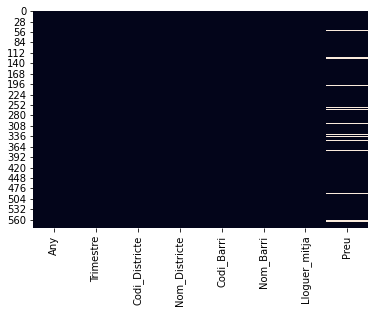

In [11]:

sns.heatmap(df.isnull(), cbar=False)

Comprovem que les dades nul·les només estan a la variable preu, que nómes són el 7,54% de les dades totals que té aquesta variable i que aquestes dades nul·les no estan concentrades en un sol tram.Per tot això, decidim eliminar aquestes dades.

- **Eliminació de files amb dades nuls:**

In [12]:
df.dropna(inplace= True)

- **Comprovació de dades totals i nuls que quedan:**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             540 non-null    int64  
 1   Trimestre       540 non-null    int64  
 2   Codi_Districte  540 non-null    int64  
 3   Nom_Districte   540 non-null    object 
 4   Codi_Barri      540 non-null    int64  
 5   Nom_Barri       540 non-null    object 
 6   Lloguer_mitja   540 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 38.0+ KB


In [14]:
df.isnull().sum()

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

- **Anàlisi estadística de la variable 'Preu':**

In [15]:
df['Preu'].describe()

count     540.000000
mean      442.157222
std       457.358745
min         6.700000
25%        12.775000
50%       232.750000
75%       815.875000
max      1816.500000
Name: Preu, dtype: float64

Podem observar que la diferencia entre el mínim(6,7) i el maxim(1816,5) es massa gran.

Mirem altres variables per veure on pot estar el problema:


In [16]:
df['Any'].value_counts()

2021    540
Name: Any, dtype: int64

Les dades són totes de l'any 2021


In [18]:
df['Lloguer_mitja'].value_counts()

Lloguer mitjà per superfície (Euros/m2 mes)    270
Lloguer mitjà mensual (Euros/mes)              270
Name: Lloguer_mitja, dtype: int64

Observem que la variable 'Lloguer_mitja' té dos tipus de mesurament diferents: Euros/mes y Euros/m2 mes.\
Per poder analitzar i comparar correctament les dades, dividim el dataframe en dos diferents: un de lloguer mensual i un altre de lloguer superficie.


In [19]:
Lloguer_superficie = df.groupby('Lloguer_mitja').get_group('Lloguer mitjà per superfície (Euros/m2 mes)')
Lloguer_superficie

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
73,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.8
74,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),12.3
75,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),15.5
76,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),13.3
77,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà per superfície (Euros/m2 mes),12.9
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


- **Anàlisi estadística de la variable numérica 'Preu' en el dataframe de Lloguer-superficie:**

In [20]:

Lloguer_superficie['Preu'].describe()

count    270.000000
mean      12.720741
std        1.701480
min        6.700000
25%       11.625000
50%       12.750000
75%       13.600000
max       18.000000
Name: Preu, dtype: float64

Veiem que la variable té 270 dades, que la mitjana del preu a l'any 2021 a Barcelona es de 12,72 €/m2 mes; que el preu més baix és de 6,7 €/m2 mes i que la més alta es de 18 €/m2 mes.

In [21]:
Lloguer_mensual = df.groupby('Lloguer_mitja').get_group('Lloguer mitjà mensual (Euros/mes)')
Lloguer_mensual

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
506,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà mensual (Euros/mes),1205.3
507,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà mensual (Euros/mes),700.5
508,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà mensual (Euros/mes),977.8
509,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà mensual (Euros/mes),826.2


Finalment, ens decidim pel dataframe de Lloguer_superficie, ja que la comparativa i l'anàlisi del preu és més exacta en tenir en compte la superfície també.

## Una variable categòrica (Districte )

In [22]:
Lloguer_superficie['Nom_Districte'].value_counts()

Horta-Guinardó         40
Nou Barris             40
Sant Martí             40
Sants-Montjuïc         28
Sant Andreu            26
Sarrià-Sant Gervasi    24
Eixample               24
Gràcia                 20
Ciutat Vella           16
Les Corts              12
Name: Nom_Districte, dtype: int64

Als diferents gràfics podem veure com es distribueixem les dades per districte, és a dir, quantes dades tenim de cada districte:\



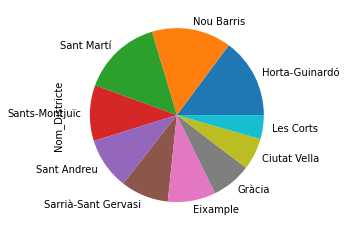

In [29]:
Lloguer_superficie['Nom_Districte'].value_counts().plot.pie()
plt.savefig('Lloguer_Districte_Pie.jpg')

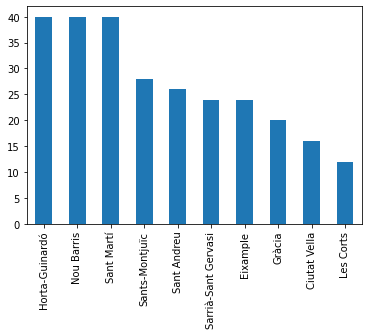

In [30]:
Lloguer_superficie['Nom_Districte'].value_counts().plot.bar()
plt.savefig('Lloguer_Districte_Bar.jpg')

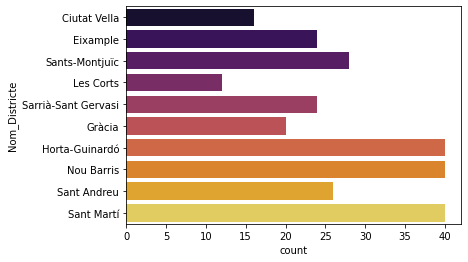

In [31]:
sns.countplot(data=Lloguer_superficie, y='Nom_Districte', palette='inferno')
plt.savefig('Lloguer_Districte_count.jpg')

## Una variable numèrica (Preu)

In [ ]:
Lloguer_superficie['Preu'].value_counts()

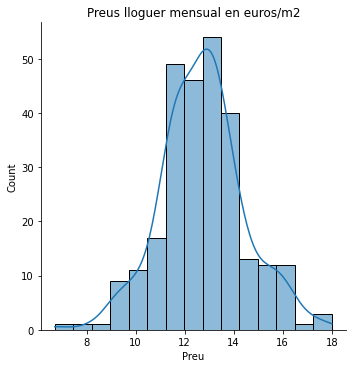

In [61]:

sns.displot(Lloguer_superficie['Preu'],
            bins=15,          # ancho de las lineas
            #color='violet',    #  color
            kde=True,        # linea densidad
            #rug=True,  # gráfica 'rug'(de "alfombra"
           )
plt.title('Preus lloguer mensual en euros/m2')
plt.savefig('Lloguer_preu_bar.jpg')            

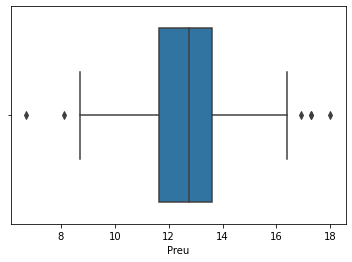

In [34]:
sns.boxplot(x="Preu", data=Lloguer_superficie)
plt.savefig('Lloguer_preu_boxplot')

En aquests gràfics podem veure que la major part dels preus es concentren entre 12 i 14 €/m2-mes i que hi ha molts pocs pisos de menys de 8 i de més de 16 €/m2-mes.
Al ser una variable numèrica, fem un boxplot per apreciar el preu mitjà que es de 13 €/m2-mes, així com aquests preus extrems o 'outliers' que surten del rang mitjà: tenim un parell per sota dels 8 €/m2-mes i tres per sobre del 16€/m2-mes.

## Una variable numèrica i una categòrica (Districte i Preu)

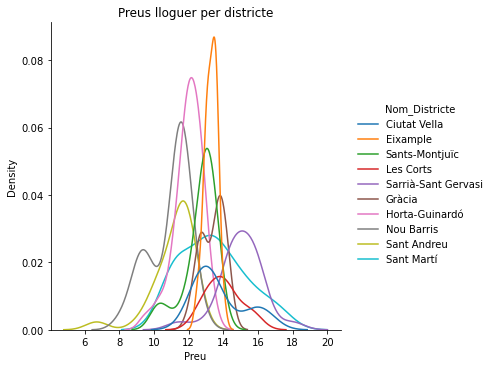

In [59]:
sns.displot(data=Lloguer_superficie, x="Preu", hue="Nom_Districte", kind="kde")
plt.title('Preus lloguer per districte')
plt.savefig('Lloguer_districte_preu_displot.jpg')

En aquest gràfic veiem com es distribueixen els preus a cada districte. \
Així podem veure, per exemple, que a l'Eixample els preus es concentran entre 12 i 14 €/m2-mes i a Sarrià-Sant Gervasi es concentran entre 14 i 17 €/m2-mes. A altres districtes com, per exemple, sant Martí el rang de preus és més ampli i va de 10 a 18 €/m2-mes.
També podem observar que els preus extrems baixos pertanyen al districte de Sant Andreu i els alts a Sarrià-Sant Gervasi, Ciutat Vella i Sant Martí.

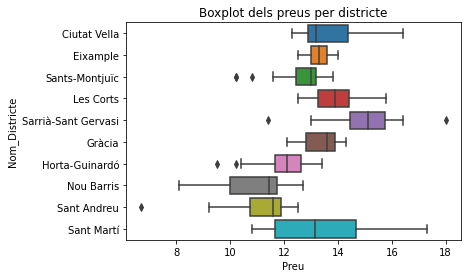

In [58]:
sns.boxplot(x='Preu', y='Nom_Districte',data=Lloguer_superficie)
plt.title('Boxplot dels preus per districte')
plt.savefig('Lloguer_districte_preu_boxplot.jpg')

En aquest boxplot podem visualitzar també la distribució de preus per districte i els preus mitjos de cadascun, així com els outliers de cada districte.


In [51]:
Lloguer_superficie.groupby('Nom_Districte')[['Preu']].mean()


,Preu
Nom_Districte,
Ciutat Vella,13.775000
Eixample,13.300000
Gràcia,13.380000
Horta-Guinardó,11.987500
Les Corts,14.008333
Nou Barris,10.922500
Sant Andreu,11.153846
Sant Martí,13.440000
Sants-Montjuïc,12.678571


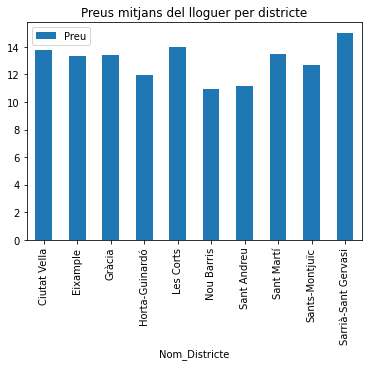

In [57]:
Lloguer_superficie.groupby('Nom_Districte')[['Preu']].mean().plot.bar()
plt.title('Preus mitjans del lloguer per districte')
plt.savefig('LLoguer_districte_preu_mean_bar.jpg')

A la taula i el gràfic de dalt podem veure la mitjana dels preus per districte, el que ens permet comparar-los entre ells o amb la mitjana de la ciutat.
Podem dir que els preus mes baixs están en Nou Barris i els més alts a Sarrià-Sant Gervasi i que els distrcites amb preus més cars que la mitjana de Barcelona son Sarrià-Sant Gervasi, Les Corts, Ciutat Vella, Sant Martí i Gracia i els que estan per sota son Horta_Guinardó,Sant andreu i Nou Barris. 

## Dues variables numèriques (Any o Trimestre i Preu)

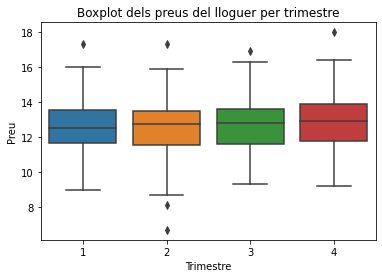

In [55]:
sns.boxplot(x='Trimestre', y='Preu',data=Lloguer_superficie)
plt.title('Boxplot dels preus del lloguer per trimestre')
plt.savefig('Lloguer_trimestre_preu_snsboxplot.jpg')

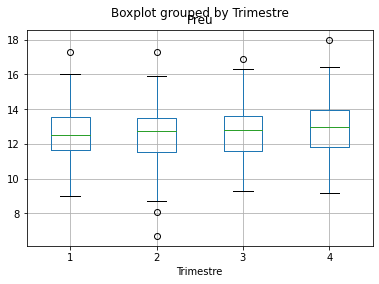

In [54]:
Lloguer_superficie.boxplot(column='Preu', by= 'Trimestre')
plt.savefig('Lloguer_trimestre_preu_boxplot.jpg')

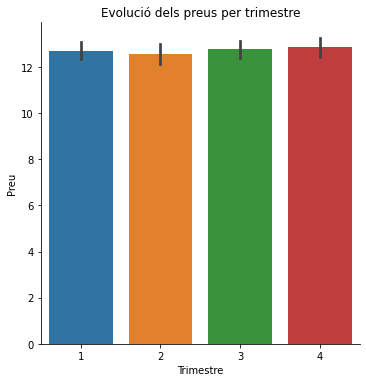

In [52]:
sns.catplot(data=Lloguer_superficie, x='Trimestre', y='Preu',kind='bar')
plt.title('Evolució dels preus per trimestre')
plt.savefig('Lloguer_trimestre_preu_catplot.jpg')

Com que són dues variables numériques fem boxplot i catplot per veure com es distribueixen els preus en cadascun dels quatre trimestres del any 2021.\
Veiem que al llarg de l'any hi va haver una petita baixada als preus al segon trimestre però que al tercer i al quart es veu una tendència a l'increment.\
Tenint en compta tot l'any, veiem que els preus han pujat desde pricipi d'any al final.


## Tres variables (Barri o Districte, Trimestre i Preu)

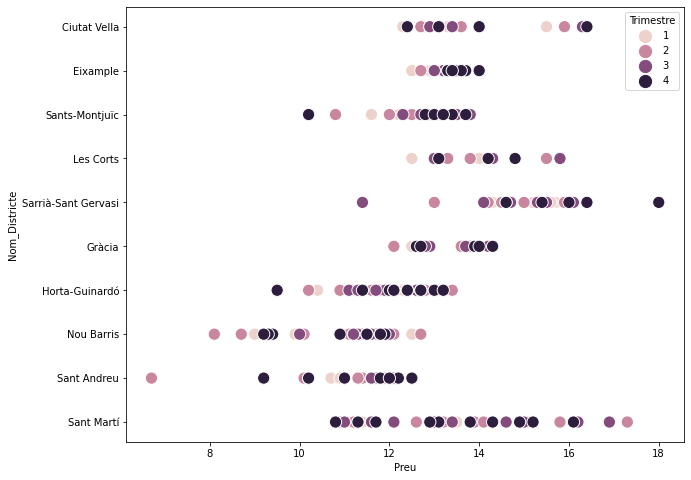

In [43]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=Lloguer_superficie, x='Preu', y='Nom_Districte', hue='Trimestre',size = 'Trimestre',sizes=(150,150))
plt.savefig('Lloguer_preu_districte_trimestre_scatterplot.jpg')

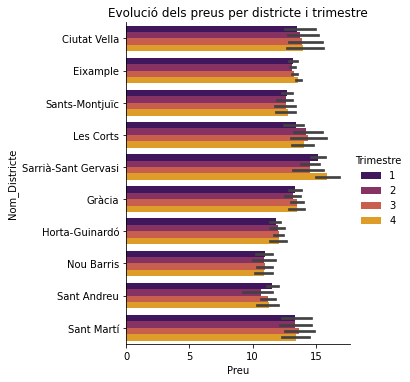

In [51]:
sns.catplot(data=Lloguer_superficie, x='Preu', y='Nom_Districte',hue='Trimestre', kind='bar',palette='inferno')
plt.title("Evolució dels preus per districte i trimestre")
plt.savefig('Preu_Trimestre_Districte_catplot.jpg')


Tant amb el scatter plot com amb el cat plt podemobservar com es relacionen les tres variables. En aquest cas,  veiem com evolucionen els preus al llarg del quatre trimestres a cada distrcite i les diferències entre ells.\
Podem observar,en una primera visulització; que si bé la tendència és a l'augment de preus del primer a l'últim trimestre de l'any, en el cas de Sant Andreu o Sants-Montjuic los preus han baixat des del principi d'any al final.També veiem que aquest increment no és lineal a tots els districtes.

## Exercici 2

Exporta els gràfics com imatges o com HTML.




In [ ]:
# savefig('nom del arxiu.jpg') 


El codi anterior ens crea la següent imatge amb format jpg a la mateixa ruta on es troba l'script que utilitzem per crear i desar la imatge.Podem veure com es defineix l'extensió del fitxer al costat del nom de la imatge en un sol string.\
Matplotlib reconeix l'extensió utilitzada en el nom del fitxer i suporta els formats png, pdf, ps, eps i svg.\
Un cop guardada la podem exportar en el format que l'hágim desat.



## Exercici 3

Proposa alguna visualització que creguis que pot resultar interessant.

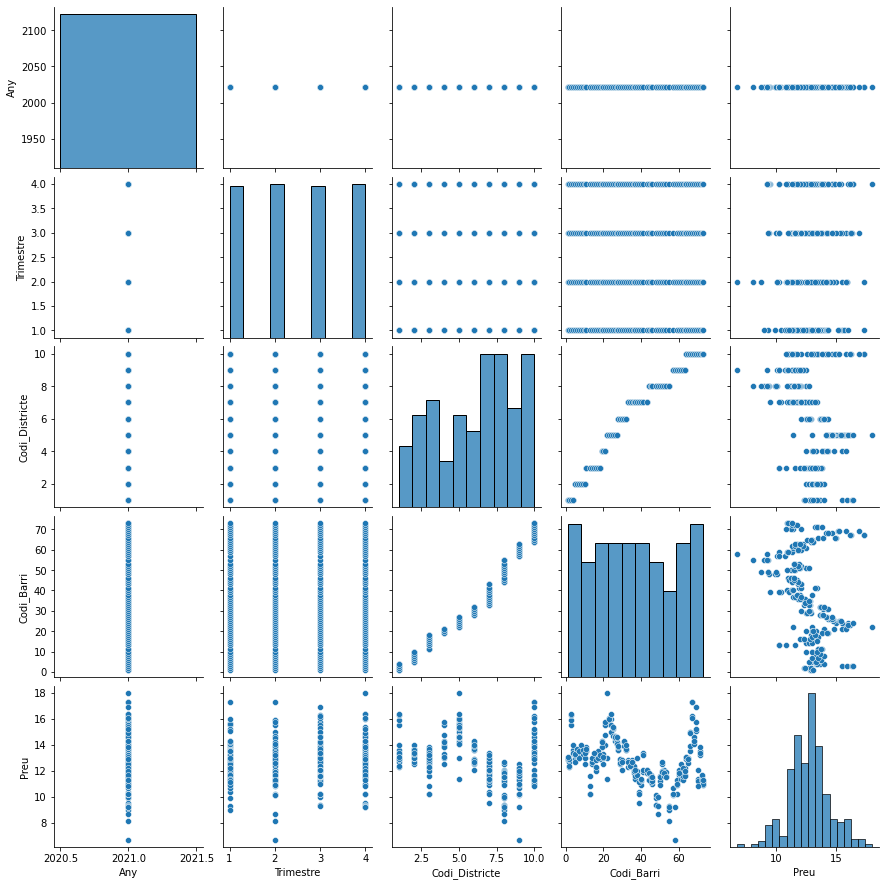

In [49]:
sns.pairplot(Lloguer_superficie)


Pairplot() visualitza totes les distribucions possibles de variables numèricas en el dataset. Aquest em sembla una bona forma de veura  immmediatament les relacions entre las características. 

Aquí podem veure que:\
- La variable any té un sol valor\
- La variable trimestre es divideix en quatre rangs iguals\
- Les variables 'Codi_Distrcite i 'Codi_Barri' són de codificació numèrica\
- La variable 'Preu' és la variable dependent, la única que fa variar les altres variables.